In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('covid19-corona-virus-india-dataset.zip')
df.head()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
0,2020-01-30,Kerala,1,0,0,10.8505,76.2711,0,1
1,2020-01-31,Kerala,1,0,0,10.8505,76.2711,0,1
2,2020-02-01,Kerala,2,0,0,10.8505,76.2711,0,2
3,2020-02-02,Kerala,3,0,0,10.8505,76.2711,0,3
4,2020-02-03,Kerala,3,0,0,10.8505,76.2711,0,3


In [3]:
df.shape

(1429, 9)

In [4]:
df.columns

Index(['Date', 'Name of State / UT', 'Total Confirmed cases (Indian National)',
       'Total Confirmed cases ( Foreign National )',
       'Cured/Discharged/Migrated', 'Latitude', 'Longitude', 'Death',
       'Total Confirmed cases'],
      dtype='object')

In [5]:
df1=df.drop(['Latitude','Longitude'],axis='columns')
df1.head()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Death,Total Confirmed cases
0,2020-01-30,Kerala,1,0,0,0,1
1,2020-01-31,Kerala,1,0,0,0,1
2,2020-02-01,Kerala,2,0,0,0,2
3,2020-02-02,Kerala,3,0,0,0,3
4,2020-02-03,Kerala,3,0,0,0,3


In [6]:
df1['State']=df1['Name of State / UT']
df1['Total_cases']=df1['Total Confirmed cases (Indian National)']
df1['Cured']=df1['Cured/Discharged/Migrated']

In [7]:
df2=df1.drop(['Name of State / UT','Total Confirmed cases (Indian National)','Cured/Discharged/Migrated','Total Confirmed cases ( Foreign National )'],axis='columns')

In [8]:
df2.head(10)

,Date,Death,Total Confirmed cases,State,Total_cases,Cured
0,2020-01-30,0,1,Kerala,1,0
1,2020-01-31,0,1,Kerala,1,0
2,2020-02-01,0,2,Kerala,2,0
3,2020-02-02,0,3,Kerala,3,0
4,2020-02-03,0,3,Kerala,3,0
5,2020-02-04,0,3,Kerala,3,0
6,2020-02-05,0,3,Kerala,3,0
7,2020-02-06,0,3,Kerala,3,0
8,2020-02-07,0,3,Kerala,3,0
9,2020-02-08,0,3,Kerala,3,0


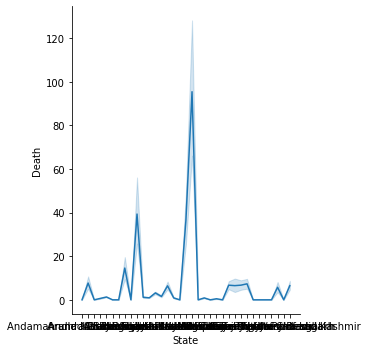

In [9]:
sns.relplot(x='State',y='Death',kind='line',data=df2)

In [10]:
date=np.array([i for i in range(len('Date'))]).reshape(-1,1)
date

array([[0],
       [1],
       [2],
       [3]])

In [11]:
df3=df2[['Date','State','Cured','Death','Total_cases','Total Confirmed cases']]

In [12]:
df3.head()

,Date,State,Cured,Death,Total_cases,Total Confirmed cases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


Text(0, 0.5, 'Total_cases')

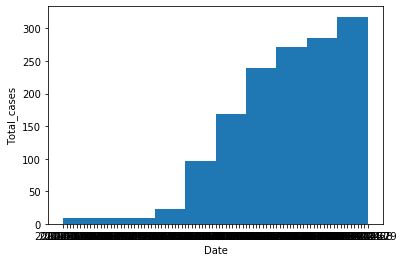

In [13]:
plt.hist(df3.Date)
plt.xlabel('Date')
plt.ylabel('Total_cases')

In [14]:
df3.isnull().sum()

Date                     0
State                    0
Cured                    0
Death                    0
Total_cases              0
Total Confirmed cases    0
dtype: int64

In [15]:
df4=df3.dropna()

In [16]:
df4.shape

(1429, 6)

In [17]:
df4.head()

,Date,State,Cured,Death,Total_cases,Total Confirmed cases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


In [18]:
dummies=pd.get_dummies(df4.State)
dummies.head()

,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Goa,Gujarat,...,Rajasthan,Tamil Nadu,Telengana,Tripura,Union Territory of Chandigarh,Union Territory of Jammu and Kashmir,Union Territory of Ladakh,Uttar Pradesh,Uttarakhand,West Bengal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df5=df4.drop('State',axis='columns')

In [47]:
df6=pd.concat([df5,dummies],axis='columns')
df6.head()

,Date,Cured,Death,Total_cases,Total Confirmed cases,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,...,Rajasthan,Tamil Nadu,Telengana,Tripura,Union Territory of Chandigarh,Union Territory of Jammu and Kashmir,Union Territory of Ladakh,Uttar Pradesh,Uttarakhand,West Bengal
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,3,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,3,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
df6.columns

Index(['Date', 'Cured', 'Death', 'Total_cases', 'Total Confirmed cases',
       'Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telengana',
       'Tripura', 'Union Territory of Chandigarh',
       'Union Territory of Jammu and Kashmir', 'Union Territory of Ladakh',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype='object')

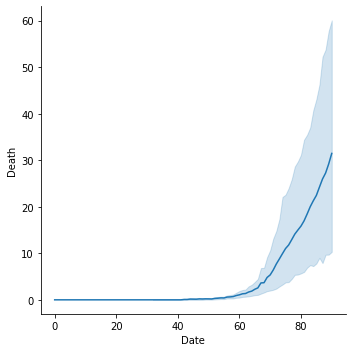

In [97]:
sns.relplot(x='Date',y='Death',kind='line',data=df5)

In [48]:
x=df6.drop('Death',axis='columns')
y=df6.Death

In [49]:
df6.shape

(1429, 40)

(array([  9.,   9.,   9.,  23.,  97., 168., 239., 272., 285., 318.]),
 array([ 0.,  9., 18., 27., 36., 45., 54., 63., 72., 81., 90.]),
 <a list of 10 Patch objects>)

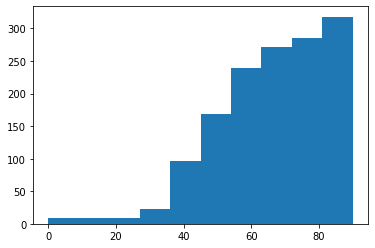

In [51]:
plt.hist(df6.Date)

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test ,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [68]:
#ensemble when multiple alogirthm predict
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [69]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
model.score(x_test,y_test)

0.9190048767210122

In [71]:
y_train

1423    25
531      0
286      0
1341     0
916      5
        ..
510      3
1205     0
1223     0
1106    18
1055     0
Name: Death, Length: 1143, dtype: int64

In [110]:
model.predict(x_test)
yp[0:10]

array([ 25.23113379,  12.29411064,   6.5590871 ,  -9.33432751,
         3.98670156,   5.62314427,   2.37732631, -10.65897452,
        -1.31898152,  10.35641521])

In [59]:
     y_predicted=model.predict(x_test)
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_test,y_predicted)
cn

array([[1]], dtype=int64)

In [73]:
x_test

,Cured,Total_cases,Total Confirmed cases,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,...,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29
750,0,0,229,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
480,17,0,33,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1113,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
197,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
533,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,13,0,82,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
442,11,54,55,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
846,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1254,324,0,447,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


,Cured,Death,Total_cases,Total Confirmed cases,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,...,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29
1424,321,26,0,1004,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1425,2,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1426,462,34,0,2053,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1427,33,0,0,54,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1428,119,22,0,725,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [43]:
df5=df4
df5.Date=le.fit_transform(dfle.Date)
df5

,Date,State,Cured,Death,Total_cases,Total Confirmed cases
0,0,Kerala,0,0,1,1
1,1,Kerala,0,0,1,1
2,2,Kerala,0,0,2,2
3,3,Kerala,0,0,3,3
4,4,Kerala,0,0,3,3
...,...,...,...,...,...,...
1424,90,Telengana,321,26,0,1004
1425,90,Tripura,2,0,0,2
1426,90,Uttar Pradesh,462,34,0,2053
1427,90,Uttarakhand,33,0,0,54


,Cured,Death,Total_cases,Total Confirmed cases,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,...,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,1
1424,321,26,0,1004,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1425,2,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1426,462,34,0,2053,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1427,33,0,0,54,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1428,119,22,0,725,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
